# Volume Dataset Analysis

In this exercise you will be analyzing a DICOM dataset. This dataset is not as conveniently organized on the filesystem as some of the datasets we have seen in the lesson just now. Rather, this dataset looks like somethign that you are likely to get as a raw dump from a clinical data archive.  

Your task is to use the skills you have acquired in this lesson to go through this dataset and answer (or provide your best quess to) the following questions:
1. What imaging modality was used to produce this dataset?
1. Data from how many patients does the dataset include?
1. How many studies are in the dataset?
1. What is the oldest and most recent study in the dataset?
1. How many series are in the dataset?

In addition, do the following tasks:

1. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
1. The dataset contains two outliers. Can you find them? Type up why do you think these volumes are outliers.

<TYPE YOUR ANSWERS HERE>

In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [2]:

path = r"data"
dirs = np.array([[(os.path.join(dp, f), pydicom.dcmread(os.path.join(dp, f), stop_before_pixels = True)) for f in files]
                   for dp,_,files in os.walk(path) if len(files) != 0])

In [3]:

instances = dirs[0]
len(instances)

864

In [8]:
dirs

array([[['data/MR.X.1.2.276.0.7230010.3.1.4.1745591248.8012.1587368529.7860',
         (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.229098847496270476126665028704
(0008, 0020) Study Date                          DA: '19940112'
(0008, 0021) Series Date                         DA: '19940112'
(0008, 0023) Content Date                        DA: '19940112'
(0008, 0030) Study Time                          TM: '085518'
(0008, 0031) Series Time                         TM: '090803'
(0008, 0033) Content Time                        TM: '090803'
(0008, 0050) Accession Number                    SH: '4468773825686010'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'Imaging Bio

In [11]:
len(dirs)

1

In [18]:
dirs[0]

array([['data/MR.X.1.2.276.0.7230010.3.1.4.1745591248.8012.1587368529.7860',
        (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.229098847496270476126665028704
(0008, 0020) Study Date                          DA: '19940112'
(0008, 0021) Series Date                         DA: '19940112'
(0008, 0023) Content Date                        DA: '19940112'
(0008, 0030) Study Time                          TM: '085518'
(0008, 0031) Series Time                         TM: '090803'
(0008, 0033) Content Time                        TM: '090803'
(0008, 0050) Accession Number                    SH: '4468773825686010'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'Imaging Biome

In [10]:
len(dirs[0])

864

In [54]:
instances[1]

array(['data/MR.X.1.2.276.0.7230010.3.1.4.1745591248.8012.1587368535.8209',
       (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.989465355096582500980522487135
(0008, 0020) Study Date                          DA: '19920505'
(0008, 0021) Series Date                         DA: '19920505'
(0008, 0023) Content Date                        DA: '19920505'
(0008, 0030) Study Time                          TM: '082216.671000'
(0008, 0031) Series Time                         TM: '084006.250000'
(0008, 0033) Content Time                        TM: '084006.281000'
(0008, 0050) Accession Number                    SH: '2071233522566153'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer          

In [58]:
series_uids = np.unique([inst[1].SeriesInstanceUID for inst in instances])
len(series_uids)

32

In [43]:
 for inst in instances:
        a=np.unique(inst[1].SeriesInstanceUID)
        print(a)

['1.3.6.1.4.1.14519.5.2.1.4429.7055.728364200801418237396977783812']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.293816446347585254079913156086']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.951760044234185587156102946949']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.285581607999649001090869568979']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.293816446347585254079913156086']
['1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.223133215495128411564518210326']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.276770677201759689184680286476']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.292260123189044684287428848596']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.283146136537679072065477030736']
['1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286']
['1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906']
['1.3.6.1.4.1.14519.5.2.1.4429.705

In [44]:
len(a)

1

In [22]:
series_uids

array(['1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286',
       '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906',
       '1.3.6.1.4.1.14519.5.2.1

In [5]:

studies_uids = np.unique([inst[1].StudyInstanceUID for inst in instances])
len(studies_uids)

10

In [21]:
studies_uids

array(['1.2.752.24.7.1550985044.2753616',
       '1.2.826.0.1.3680043.2.1125.1.9839520250291993940949520616565396',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.142872696423641709332868254917',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.173425268180092806279003900097',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.192304828189026101657054875952',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.205075845250444634584024148845',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.231796058972489013039499925050',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.729192279796218307950472057198',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.812059520220877654137991744184',
       '1.3.6.1.4.1.14519.5.2.1.4429.7055.873522078320106668263470477052'],
      dtype='<U64')

In [6]:

patient_ids = [inst[1].PatientID for inst in instances]

In [7]:
np.unique(patient_ids)

array(['123456', 'OPA135179', 'PGBM-003', 'PGBM-004', 'PGBM-005',
       'PGBM-009'], dtype='<U9')

In [16]:
print(patient_ids)

['PGBM-004', 'PGBM-005', 'PGBM-003', 'PGBM-003', 'PGBM-003', 'PGBM-009', 'PGBM-003', '123456', 'PGBM-004', 'PGBM-005', 'PGBM-005', 'PGBM-004', '123456', 'PGBM-003', 'PGBM-009', 'PGBM-009', 'PGBM-003', 'PGBM-004', 'PGBM-003', 'PGBM-003', 'PGBM-004', 'OPA135179', 'PGBM-009', 'PGBM-005', 'PGBM-004', 'PGBM-004', 'PGBM-009', 'PGBM-004', 'PGBM-003', 'PGBM-004', 'PGBM-003', 'PGBM-004', 'PGBM-009', 'PGBM-004', 'PGBM-005', 'PGBM-005', 'PGBM-005', 'PGBM-003', 'PGBM-004', '123456', 'PGBM-004', 'PGBM-004', 'PGBM-004', 'PGBM-003', 'PGBM-003', 'PGBM-003', 'PGBM-009', 'PGBM-009', 'PGBM-005', 'PGBM-009', 'PGBM-005', '123456', 'PGBM-004', 'PGBM-003', 'PGBM-004', 'PGBM-003', 'OPA135179', 'PGBM-005', '123456', '123456', 'PGBM-009', 'OPA135179', '123456', 'PGBM-009', 'PGBM-005', 'PGBM-009', 'PGBM-004', 'PGBM-009', '123456', 'PGBM-009', '123456', 'PGBM-009', '123456', 'OPA135179', 'PGBM-005', 'PGBM-004', 'PGBM-004', 'PGBM-003', 'PGBM-009', '123456', '123456', 'PGBM-009', 'PGBM-005', 'PGBM-009', 'PGBM-004',

In [19]:

# Create hash of all modalities for individual series

series_uids_modality_map = {uid: s[1].Modality for uid in series_uids for s in instances if s[1].SeriesInstanceUID == uid }

In [20]:
series_uids_modality_map

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': 'CT',
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.

In [39]:
len(series_uids_modality_map)

32

In [23]:
slices_ct = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == "1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286"]

slices_mr1 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[4][0]]

slices_mr2 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[9][0]]

In [38]:
list(series_uids_modality_map.items())[4][0]

'1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799'

In [29]:
slices_ct

[(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
 (0008, 0016) SOP Class UID                       UI: CT Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.77920482377314085669302253800712109
 (0008, 0020) Study Date                          DA: '20190101'
 (0008, 0021) Series Date                         DA: '20190101'
 (0008, 0023) Content Date                        DA: '20190101'
 (0008, 0030) Study Time                          TM: '112200'
 (0008, 0031) Series Time                         TM: '112200'
 (0008, 0033) Content Time                        TM: '112200'
 (0008, 0050) Accession Number                    SH: '1'
 (0008, 0060) Modality                            CS: 'CT'
 (0008, 0070) Manufacturer                        LO: 'Unknown manufacturer'
 (0008, 0090) Referring Physician's Name          PN: 'Unknown'
 (0008, 1030) Study Description                   LO: 'Sample Study'
 (0008, 103e

In [31]:
len(slices_ct)

139

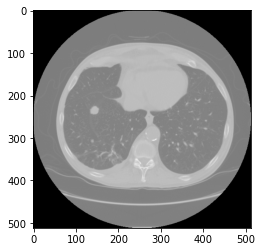

In [33]:

plt.imshow(slices_ct[10].pixel_array, cmap="gray")

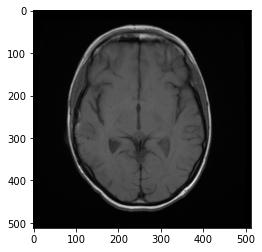

In [25]:
plt.imshow(slices_mr1[10].pixel_array, cmap="gray")

In [34]:
len(slices_mr1)

22

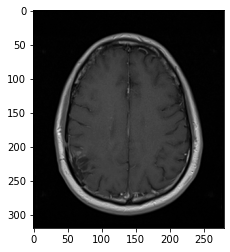

In [30]:
plt.imshow(slices_mr2[10].pixel_array, cmap="gray")

In [35]:
len(slices_mr2)

22

In [59]:

study_dates = sorted(np.unique([inst[1].StudyDate for inst in instances]))
study_dates

['19880512',
 '19910103',
 '19910702',
 '19920505',
 '19930622',
 '19940112',
 '19950329',
 '19951017',
 '20150116',
 '20190101']

In [60]:
print(np.unique([inst[1].StudyDate for inst in instances if inst[1].Modality == "CT"]))

['20190101']


In [61]:
slices_odd_mr = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].StudyDate == "20150116"]

In [71]:
slices_odd_mr

[(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
 (0008, 0012) Instance Creation Date              DA: '20150116'
 (0008, 0013) Instance Creation Time              TM: '160254.906000'
 (0008, 0016) SOP Class UID                       UI: MR Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.33.37105.2015011616025222191828189
 (0008, 0020) Study Date                          DA: '20150116'
 (0008, 0021) Series Date                         DA: '20150116'
 (0008, 0022) Acquisition Date                    DA: '20150116'
 (0008, 0023) Content Date                        DA: '20150116'
 (0008, 0030) Study Time                          TM: '154708'
 (0008, 0031) Series Time                         TM: '160254.859000'
 (0008, 0032) Acquisition Time                    TM: '160006.327500'
 (0008, 0033) Content Time                        TM: '160254.906000

In [63]:
print(np.unique([s.SeriesInstanceUID for s in slices_odd_mr]))
print(len(slices_odd_mr))

['1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0']
36


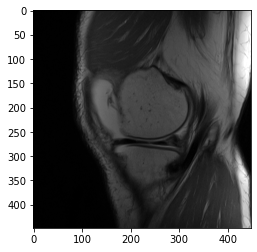

In [75]:
plt.imshow(slices_odd_mr[15].pixel_array, cmap="gray")

In [76]:
volumes = dict()

for inst in instances:
    sid = inst[1].SeriesInstanceUID
    if (sid not in volumes):
        volumes[sid] = dict()
        
    volumes[sid]["StudyDate"] = inst[1].StudyDate
    volumes[sid]["Width"] = inst[1].Columns
    volumes[sid]["Height"] = inst[1].Rows
    volumes[sid]["PatientId"] = inst[1].PatientID
    
    if ("slice_count" not in volumes[sid]):
        volumes[sid]["slice_count"] = 0
    else:
        volumes[sid]["slice_count"] += 1

In [77]:
volumes[sid]

{'StudyDate': '19910103',
 'Width': 260,
 'Height': 320,
 'PatientId': 'PGBM-009',
 'slice_count': 24}